<a href="https://colab.research.google.com/github/geetha1811/ticker-detection-using-ml/blob/main/Financial_Market_Ticker_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow import keras
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# Load dataset (replace 'data.csv' with your dataset)
data = pd.read_csv('Financial_Market_Stock_Price.csv')

<ipython-input-28-ae95c8a0ed2d>:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Financial_Market_Stock_Price.csv')


In [ ]:
print(data.head)
print(data.tail)
print(data.describe)

<bound method NDFrame.head of           Symbol Stock Series  Prev Close  Open_StockPrice  High_StockPrice  \
0      HEROHONDA        NIFTY     1145.20           1800.0          1835.05   
1      HEROHONDA        NIFTY     1207.60           1960.0          1960.00   
2      HEROHONDA        NIFTY     1199.85           1845.0          1845.00   
3      HEROHONDA        NIFTY     1143.80           1750.0          1795.00   
4      HEROHONDA        NIFTY     1161.40           1705.0          1705.00   
...          ...          ...         ...              ...              ...   
80998        NaN          NaN         NaN              NaN              NaN   
80999        NaN          NaN         NaN              NaN              NaN   
81000        NaN          NaN         NaN              NaN              NaN   
81001        NaN          NaN         NaN              NaN              NaN   
81002        NaN          NaN         NaN              NaN              NaN   

       Low_StockPrice

In [ ]:
# Create target variable for classification (1 if next day's closing price is higher, 0 otherwise)
data['Target'] = (data['Stock_Price'].shift(-1) > data['Stock_Price']).astype(int)

In [ ]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [ ]:
# Gathering the Companies Strategies Information
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Stock_Price', 'High_StockPrice', 'Low_StockPrice', 'Close_StockPrice']])
print(scaled_data)

[[-1.18768875  2.90747415  2.89819033  3.01132663]
 [-1.19310907  3.24561404  2.90666409  2.94324428]
 [-1.20166624  2.93440086  2.84169859  2.7673649 ]
 ...
 [ 0.49612642 -0.30681682 -0.27014904 -0.28665396]
 [ 0.49613795 -0.29409767 -0.2622402  -0.28360962]
 [ 0.49614949 -0.25458713 -0.26506478 -0.25607225]]


In [ ]:
# Create features and target variable
X = scaled_data[:, :-1]
y = data['Target'].values

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [ ]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [ ]:
# ARIMA Model
# Assuming you have time series data for ARIMA
# Splitting data for ARIMA
train_data = data[:int(0.8*(len(data)))]
test_data = data[int(0.8*(len(data))):]

In [ ]:
# LSTM Model
# Assuming you have sequential data for LSTM
# Reshape the data
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=1))

In [ ]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32)

Epoch 1/100
133/133 [==============================] - 5s 5ms/step - loss: 0.1982
Epoch 2/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0521
Epoch 3/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0470
Epoch 4/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0400
Epoch 5/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0354
Epoch 6/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0333
Epoch 7/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0326
Epoch 8/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0318
Epoch 9/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0313
Epoch 10/100
133/133 [==============================] - 1s 5ms/step - loss: 0.0312
Epoch 11/100
133/133 [==============================] - 1s 7ms/step - loss: 0.0320
Epoch 12/100
133/133 [==============================] - 1s 7ms/step - loss: 0.0311
Epoch 13/100


In [ ]:
# Predictions
lstm_predictions = lstm_model.predict(X_test_lstm)

34/34 [==============================] - 2s 5ms/step


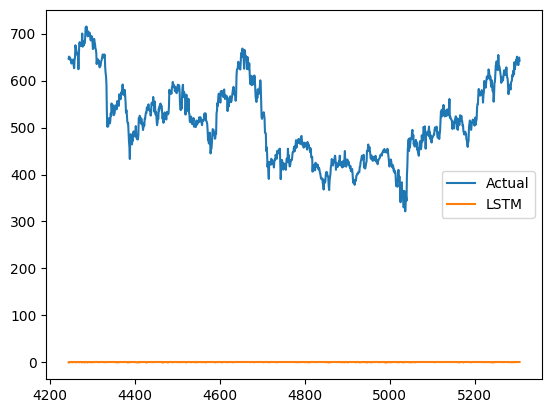

In [ ]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Open_StockPrice'], label='Actual')
plt.plot(test_data.index, lstm_predictions, label='LSTM')
plt.legend()
plt.show()

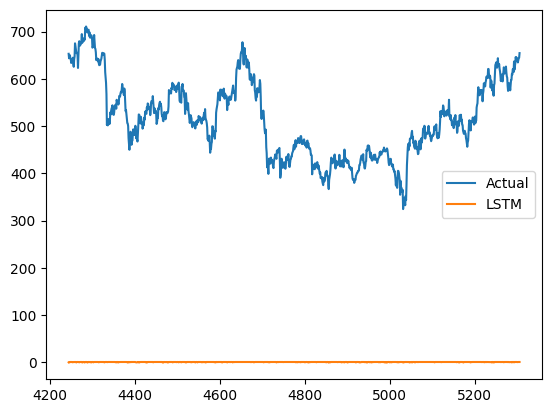

In [ ]:
# Visualization (assuming you want to visualize predictions)
plt.plot(test_data.index, test_data['Close_StockPrice'], label='Actual')
plt.plot(test_data.index, lstm_predictions, label='LSTM')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your CSV data is loaded into a DataFrame called df
# Filter data for a specific company, replace 'Company_Name' with the actual name of the company
company_data = data[data['Stock Series'] == 'NIFTY']

# Reset the index to use the row numbers as x-axis values
company_data.reset_index(drop=True, inplace=True)

# Visualization for the specific company
plt.plot(company_data.index, company_data['Close_StockPrice'], label='Actual')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.title('Stock Price for company_data')
plt.legend()
plt.show()
